In [25]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [26]:
!pip install pycaret

In [27]:
#train 데이터 / 나머지 원핫 / age는 NaN 데이터가 200개 이기 때문에 age를 종속 변수로 두고 또 모델 돌리고 싶음
import pandas as pd

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

train.head() #전부 불러오는데 시간이 걸리기 때문에 간략
#NaN : not a number


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# train = train[['Survived','Age','Fare',
                          #  'Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male',
                          #  'Embarked_C','Embarked_Q','Embarked_S','Family Size']]
# train.head()

In [29]:
import tensorflow as tf
import numpy as np

#여기에서는 필요한 열 뽑기
train = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]


#dummies  pclass랑 sex는 원핫 인코딩 (test,train 모두)
train = pd.get_dummies(train, columns = ['Pclass']) 
train = pd.get_dummies(train, columns = ['Sex'])

test = pd.get_dummies(test, columns = ['Pclass'])
test = pd.get_dummies(test, columns = ['Sex'])


#embark 결측치 행 2개 제거(train)
train['Embarked'].dropna(axis=0)

#dummies  pclass랑 sex는 원핫 인코딩 (test,train 모두)
train = pd.get_dummies(train, columns = ['Embarked'])
test = pd.get_dummies(test, columns = ['Embarked'])



# train = train.dropna(axis=0)
# print(train.info())

#Family_SIze = SibSp + Parch(train)
Family_Size =  train['SibSp'] + train['Parch']
train['Family Size'] = Family_Size
train = train.drop(['SibSp', 'Parch'], axis = 1)

#Family_SIze = SibSp + Parch(test)
Family_Size =  test['SibSp'] + test['Parch']
test['Family Size'] = Family_Size
test = test.drop(['SibSp', 'Parch'], axis = 1)

train.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family Size
0,0,22.0,7.2500,0,0,1,0,1,0,0,1,1
1,1,38.0,71.2833,1,0,0,1,0,1,0,0,1
2,1,26.0,7.9250,0,0,1,1,0,0,0,1,0
3,1,35.0,53.1000,1,0,0,1,0,0,0,1,1
4,0,35.0,8.0500,0,0,1,0,1,0,0,1,0


In [30]:
test.head()

,PassengerId,Name,Age,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family Size
0,892,"Kelly, Mr. James",34.5,330911,7.8292,NaN,0,0,1,0,1,0,1,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,NaN,0,0,1,1,0,0,0,1,1
2,894,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,NaN,0,1,0,0,1,0,1,0,0
3,895,"Wirz, Mr. Albert",27.0,315154,8.6625,NaN,0,0,1,0,1,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,NaN,0,0,1,1,0,0,0,1,2


In [31]:
#survive를 뺀 df를 새로 만든 후 age를 맨앞으로 이동(train)
age_df = train[['Age', 'Fare',	'Pclass_1',	'Pclass_2',	'Pclass_3',	'Sex_female',	'Sex_male',	'Embarked_C',	'Embarked_Q',	'Embarked_S',	'Family Size']]
age_df = age_df.sort_values(by=['Age'], axis=0, na_position='last')
age_df.head(50)

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family Size
803,0.42,8.5167,0,0,1,0,1,1,0,0,1
755,0.67,14.5000,0,1,0,0,1,0,0,1,2
644,0.75,19.2583,0,0,1,1,0,1,0,0,3
469,0.75,19.2583,0,0,1,1,0,1,0,0,3
78,0.83,29.0000,0,1,0,0,1,0,0,1,2
831,0.83,18.7500,0,1,0,0,1,0,0,1,2
305,0.92,151.5500,1,0,0,0,1,0,0,1,3
827,1.00,37.0042,0,1,0,0,1,1,0,0,2
381,1.00,15.7417,0,0,1,1,0,1,0,0,2
164,1.00,39.6875,0,0,1,0,1,0,0,1,5


In [32]:
age_df = age_df.reset_index()

In [33]:
print(age_df['Age'][714])

nan


In [34]:
age_df_train = age_df[:714]
age_df_test = age_df[714:]

In [35]:
age_df_train = age_df_train[['Age','Pclass_1','Pclass_2','Pclass_3','Family Size']]
age_df_test = age_df_test[['Pclass_1','Pclass_2','Pclass_3','Family Size']]

In [36]:
!pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose

In [37]:
import pandas as pd
from pycaret.regression import *

setup(data=age_df_train, target='Age', session_id=123, silent=True)

,Description,Value
0,session_id,123
1,Target,Age
2,Original Data,"(714, 5)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(499, 11)"


(False,
 KFold(n_splits=10, random_state=None, shuffle=False),
 'lightgbm',
 None,
 False,
 'Age',
 {'USI',
  'X',
  'X_test',
  'X_train',
  '_all_metrics',
  '_all_models',
  '_all_models_internal',
  '_available_plots',
  '_gpu_n_jobs_param',
  '_internal_pipeline',
  '_ml_usecase',
  'create_model_container',
  'data_before_preprocess',
  'display_container',
  'exp_name_log',
  'experiment__',
  'fix_imbalance_method_param',
  'fix_imbalance_param',
  'fold_generator',
  'fold_groups_param',
  'fold_groups_param_full',
  'fold_param',
  'fold_shuffle_param',
  'gpu_param',
  'html_param',
  'imputation_classifier',
  'imputation_regressor',
  'iterative_imputation_iters_param',
  'log_plots_param',
  'logging_param',
  'master_model_container',
  'n_jobs_param',
  'prep_pipe',
  'pycaret_globals',
  'seed',
  'stratify_param',
  'target_param',
  'transform_target_method_param',
  'transform_target_param',
  'y',
  'y_test',
  'y_train'},
      Pclass_1  Pclass_2  Pclass_3  ...  F

In [38]:
age_df_train.head()

,Age,Pclass_1,Pclass_2,Pclass_3,Family Size
0,0.42,0,0,1,1
1,0.67,0,1,0,2
2,0.75,0,0,1,3
3,0.75,0,0,1,3
4,0.83,0,1,0,2


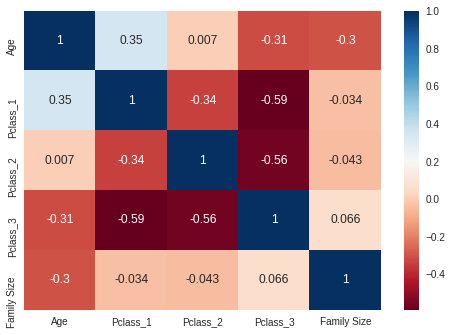

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(age_df_train.corr(), annot = True, cmap = 'RdBu')

In [40]:
age_df_test = age_df_test.reset_index()

In [41]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,10.1564,165.9955,12.8059,0.1841,0.6292,1.1539,0.076
br,Bayesian Ridge,10.2833,168.0732,12.8847,0.1754,0.6383,1.2031,0.016
ridge,Ridge Regression,10.3191,169.7090,12.9448,0.1676,0.6378,1.1876,0.016
rf,Random Forest Regressor,10.2606,171.3256,13.0174,0.1584,0.6315,1.1198,0.412
lar,Least Angle Regression,10.3592,171.9866,13.0331,0.1563,0.6401,1.1843,0.018
lr,Linear Regression,10.3591,172.2256,13.0417,0.1549,0.6405,1.1867,0.284
gbr,Gradient Boosting Regressor,10.2772,173.1747,13.0825,0.1514,0.6404,1.1435,0.053
huber,Huber Regressor,10.2700,173.6314,13.0863,0.1497,0.6386,1.1806,0.026
dt,Decision Tree Regressor,10.2964,173.5693,13.1006,0.1483,0.6398,1.1259,0.017
et,Extra Trees Regressor,10.2984,173.5910,13.1014,0.1482,0.6398,1.1260,0.363


In [42]:
finalized_model = finalize_model(best_model)
print(finalized_model)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [43]:
tuned_model = tune_model(finalized_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.3511,158.0618,12.5723,0.3877,0.8290,2.2917
1,7.9874,112.6913,10.6156,0.1534,0.3912,0.3589
2,9.3896,137.9239,11.7441,0.2713,0.6050,0.8340
3,11.7933,217.4832,14.7473,0.1604,0.6952,1.4938
4,11.0398,192.6701,13.8806,0.2465,0.8121,1.9124
5,11.4675,186.9249,13.6720,-0.0495,0.6638,1.2113
6,11.5670,190.7632,13.8117,0.0293,0.5083,0.7209
7,8.9249,125.8303,11.2174,0.3386,0.5955,0.9701
8,8.6854,141.7341,11.9052,0.2241,0.5689,0.9511
9,10.5489,196.6470,14.0231,0.0484,0.6635,1.1232


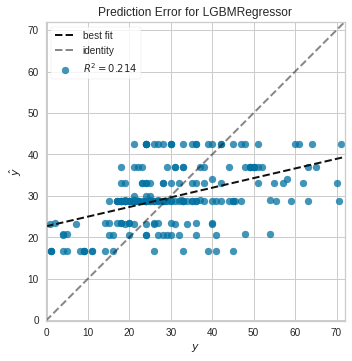

In [44]:
plot_model(tuned_model, plot='error')

In [45]:
prediction = predict_model(finalized_model, data=test)